<a href="https://colab.research.google.com/github/gokulbot/Regression-ai1-fall2019/blob/master/linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [0]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [61]:
X.shape

(100, 1)

We are fitting a model with an intercept. Lets see what it is.

In [62]:
coef

array(80.88336208)

We can plot the data.

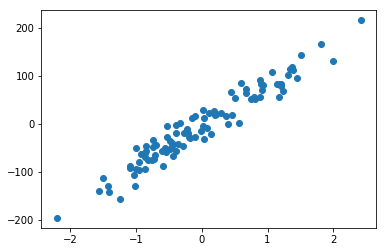

In [90]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [64]:
xgrid = np.linspace(-2.5,2.5,100)
Xgrid = xgrid.reshape(-1,1)
Xgrid.shape
xgrid.shape

(100,)

## Fit using sklearn

In [0]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([82.90456142]), -3.709228868670302)

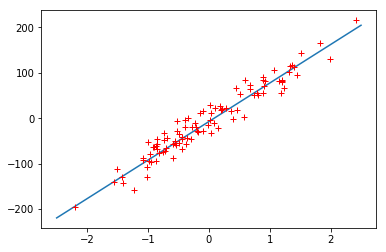

In [101]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, 'r+')

In [0]:
from sklearn.metrics import r2_score

In [103]:
r2_score(ypgrid, lr.predict(Xgrid))

0.9985360603894159

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [70]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([38, 75, 42, 94, 96, 85, 43, 90, 18, 72, 71, 71, 62, 80, 46, 77, 96,
       99, 83, 72])

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [72]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)

(0.9470513143674073, 0.9470513143674073)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0.7, 1)

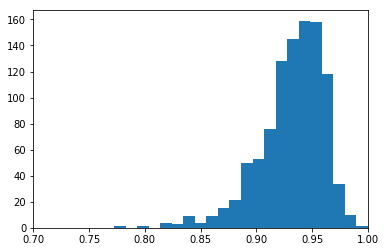

In [73]:
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(lr_s.fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

array(80.88336208)

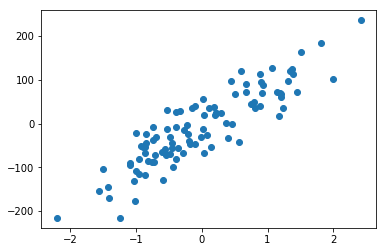

In [74]:
# your code here
Xnew, ynew, coefnew = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=40,
                       random_state=2017,
                       coef=True)
plt.plot(Xnew, ynew, 'o');
coefnew

In [75]:
X.shape


(100, 1)

In [76]:
lrnew = LinearRegression()
lrnew.fit(Xnew,ynew)
ypgrid = lrnew.predict(Xgrid)
lrnew.coef_, lrnew.intercept_

(array([84.92576075]), -7.418457737340606)

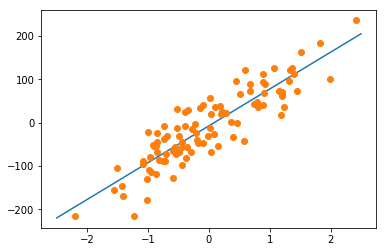

In [77]:
plt.plot(Xgrid,ypgrid);
plt.plot(Xnew,ynew,'o')

(0.7, 1)

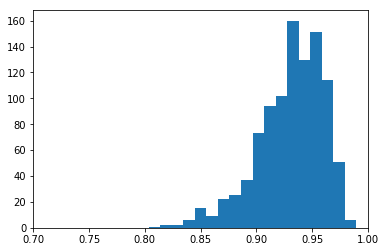

In [78]:
# your code here
scores = []
models = []
coeff= []
intercept=[]
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    
    models.append(lr_s.fit(Xsample, ysample))
    intercept.append(models[i].intercept_)
    coeff.append(models[i].coef_[0])
    scores.append(models[i].score(Xsample, ysample))
plt.hist(scores, bins=np.linspace(0.7, 1, 30));
plt.xlim(0.7,1)

(0.7, 1)

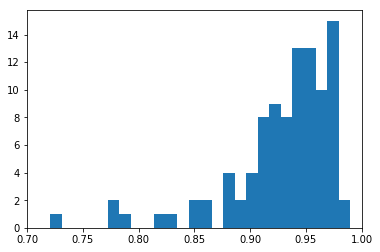

In [79]:
# your code here
scores = []
models = []
for i in range(100):
    sample_indices = np.random.choice(range(100), size=10)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    models.append(LinearRegression().fit(Xsample, ysample))
    scores.append(models[i].score(Xsample, ysample))
plt.hist(scores, bins=np.linspace(0.7, 1, 30));
plt.xlim(0.7,1)

85.669703583206

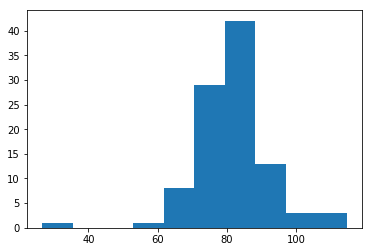

In [81]:
# your code here
plt.hist([models[i].coef_[0] for i in range(100)], bins=10);
models[i].coef_[0]

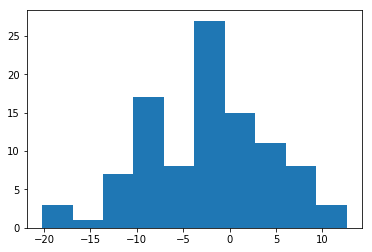

In [82]:
# your code here
plt.hist([models[i].intercept_ for i in range(100)], bins=10);

In [83]:
X.shape

(100, 1)

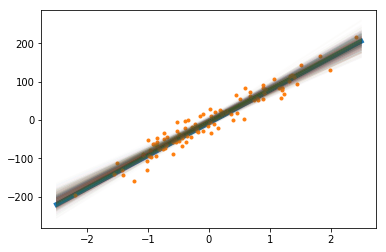

In [88]:
plt.plot(xgrid,ypgrid,lw= 5)
plt.plot(X,y ,'.')
for i in range(1000):
  line= lambda x: coeff[i]*x + intercept[i]
  plt.plot(Xgrid,line(Xgrid),alpha= 0.01)

## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [0]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [0]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [0]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

In [0]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

In [0]:
plt.plot(history.history['loss'])

In [0]:
lr3.get_weights()

### Using the Keras Functional API



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [0]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [0]:
m.get_weights()